In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline

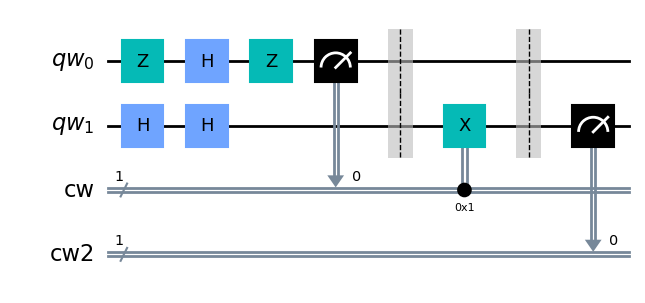

In [2]:
q_w = QuantumRegister(2, name='qw')
c_a = ClassicalRegister(1,name="cw")
c_b = ClassicalRegister(1,name="cw2")

circ= QuantumCircuit(q_w, c_a, c_b)
circ.z(q_w[0])
circ.h(q_w[1])
circ.h(q_w[0])
circ.h(q_w[1])
circ.z(q_w[0])
circ.measure(q_w[0], c_a[0])
circ.barrier(q_w[0],q_w[1])
circ.x(q_w[1]).c_if(c_a, 1)
circ.barrier()
circ.measure(q_w[1], c_b[0])

circ.draw("mpl")

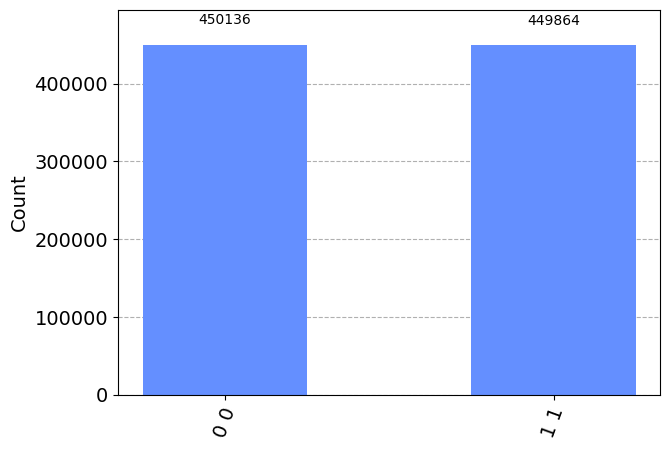

In [3]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circ, simulator, shots=900000).result()
counts = result.get_counts(circ)
plot_histogram(counts)